In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# load image from images directory
images = [
    "../img/kucing.jpg",
    "../img/gradient.png",
    "../img/Penguins.jpg",
    "../img/arizona.jpg",
    "../img/Tulips.jpg",
    "../img/Koala.jpg",
]

# Set up the subplot grid
rows = len(images)
cols = 4

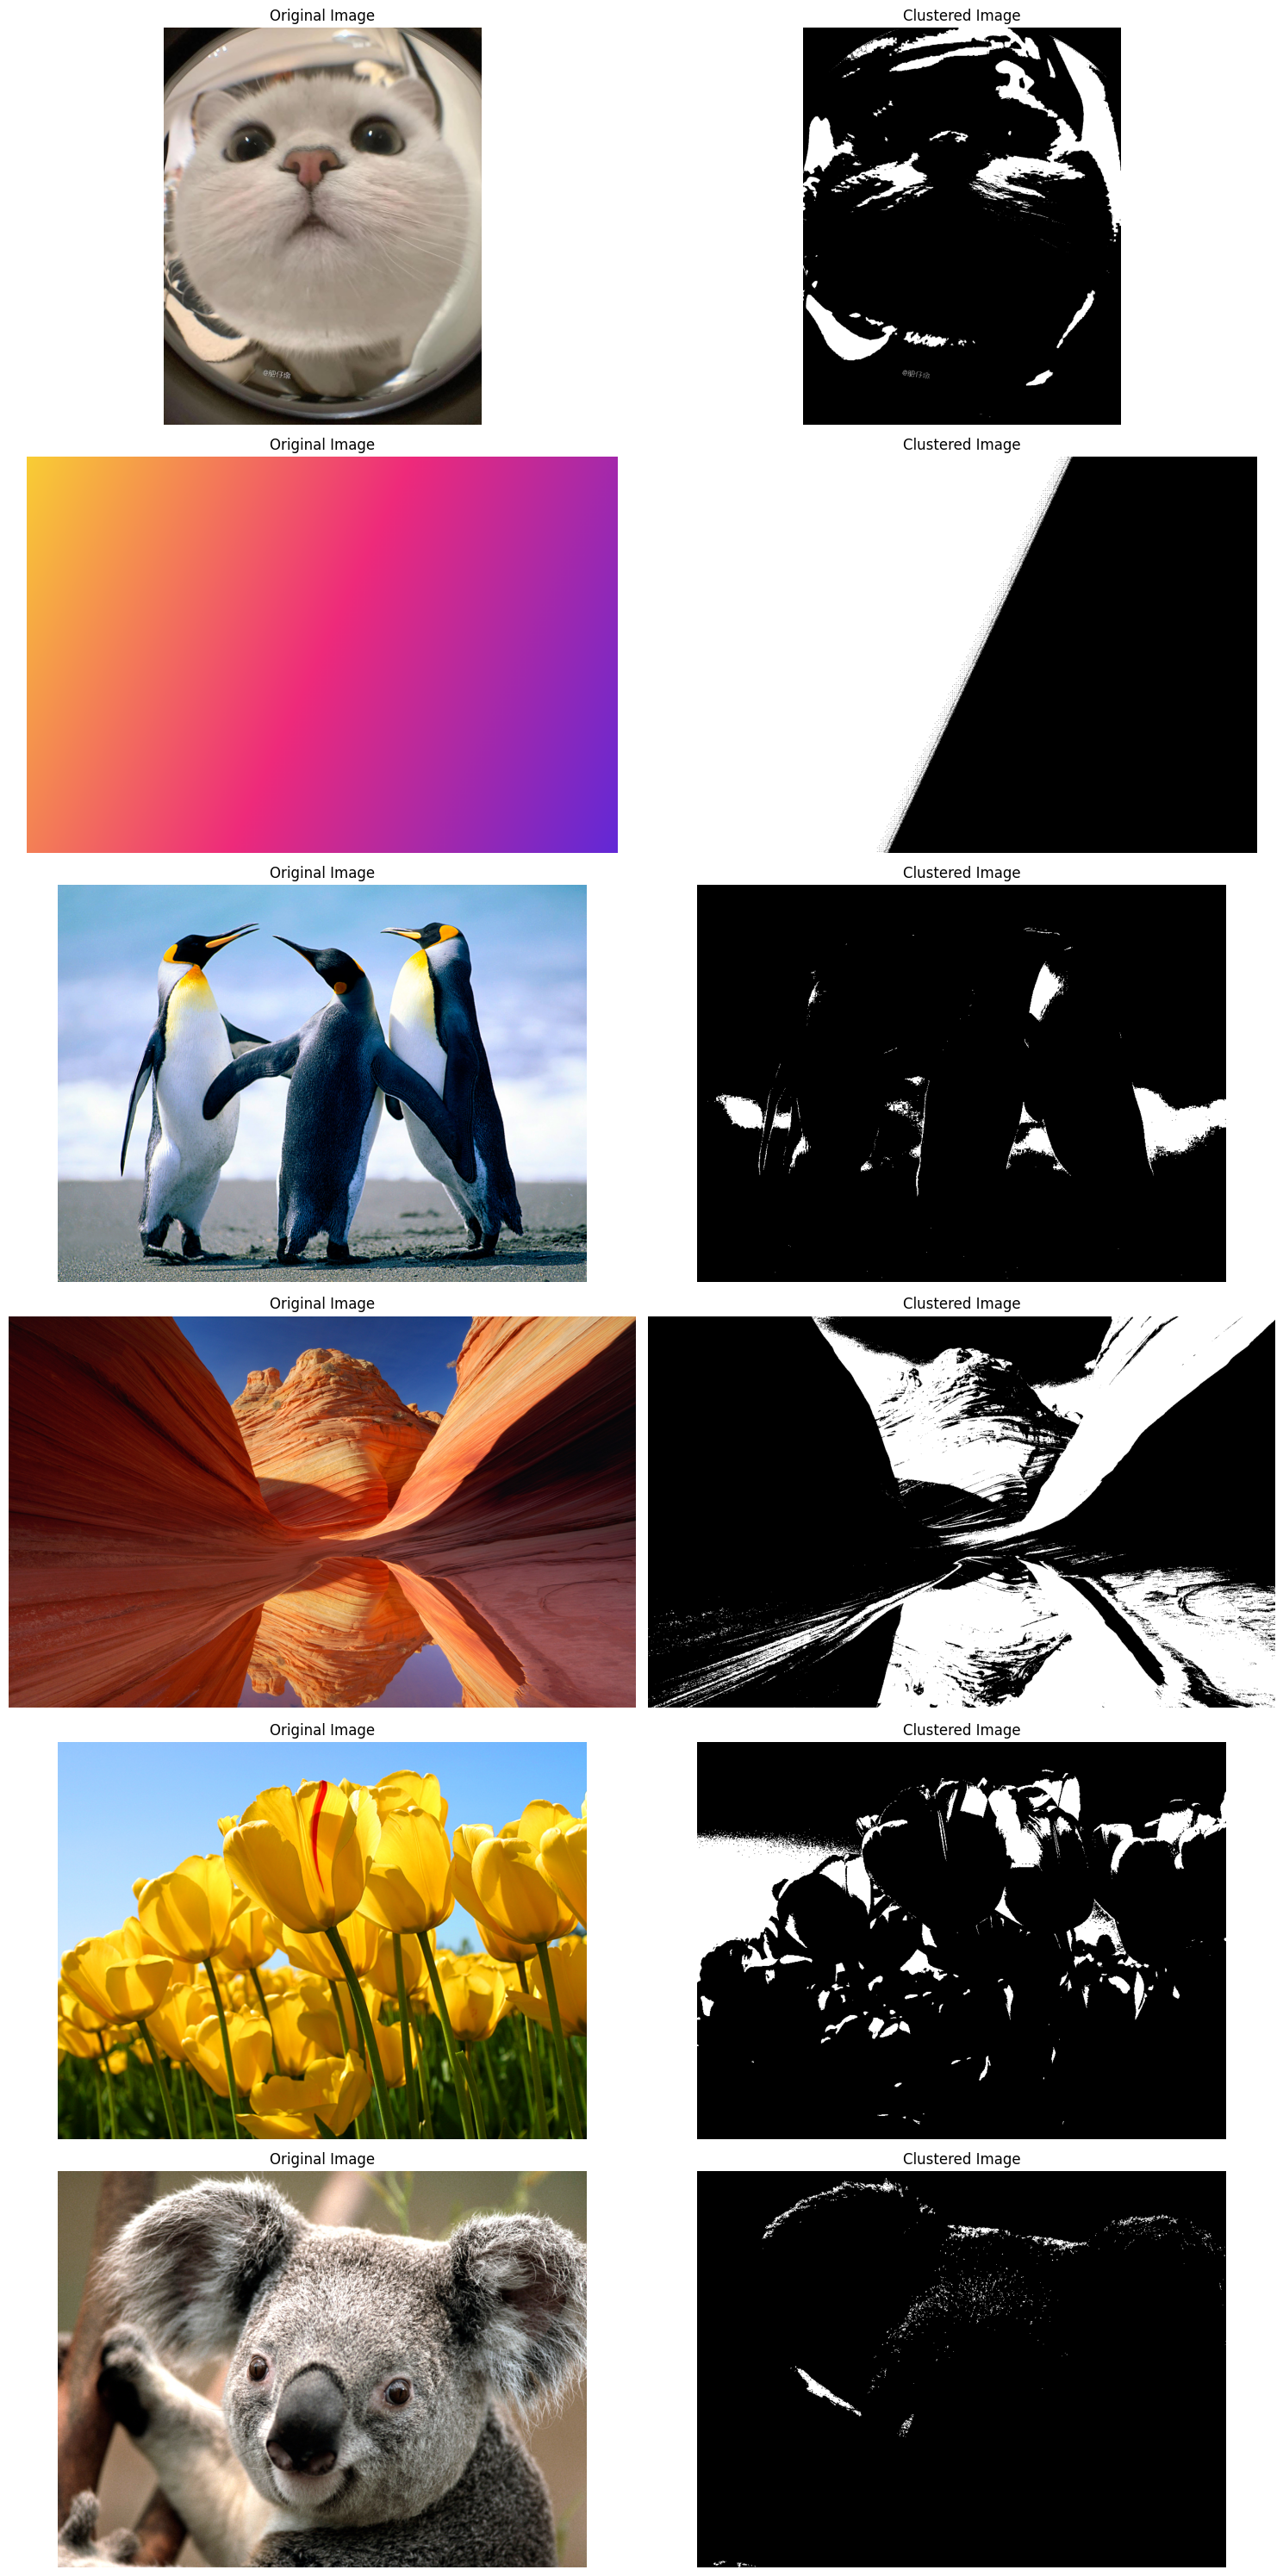

In [11]:
# Create a subplot for each image
fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))

# Loop through each image
for i, imgFilename in enumerate(images):
    # Membaca data Image
    oriImg = cv2.imread(imgFilename)

    # Display the original image
    axes[i, 0].imshow(cv2.cvtColor(oriImg, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis("off")

    # Fungsi untuk melakukan segmentasi menggunakan metode Ohlander's Recursive Histogram-Based Clustering
    def ohlander_clustering(image, threshold):
        if len(image.shape) > 2:
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        else:
            gray_image = image.copy()
        # Mendapatkan histogram dari gambar
        hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
        # Mencari nilai untuk clustering
        split_value = 0
        max_val = np.max(hist)
        for i in range(255, 0, -1):
            if hist[i] > threshold * max_val:
                split_value = i
                break
        # Segmentasi gambar
        segmented_image = np.zeros_like(gray_image)
        segmented_image[gray_image >= split_value] = 255
        return segmented_image

    # Apply Ohlander's Recursive Histogram-Based Clustering on the original image
    threshold_value = 0.7
    segmented_image = ohlander_clustering(oriImg, threshold_value)

    titles = [
        "Clustered Image",
    ]

    segmented_image = [segmented_image]

    for j in range(len(titles)):
        # Display the image
        axes[i, j + 1].imshow(segmented_image[j], cmap="gray")
        axes[i, j + 1].set_title(f"{titles[j]}")
        axes[i, j + 1].axis("off")

# Show the plot
plt.tight_layout()
plt.show()